### Data Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.components.data_loading import load_data
from src.components.data_cleaning import clean_data
from src.components.feature_engineering import create_features


In [2]:
df = load_data("../data/raw/electronics_dataset.csv")
df.head()


,user_id,product_id,category,brand,price,rating,purchase_count
0,2633,ELECTRO_1133,Laptop,Xiaomi,37710,3,9
1,631,ELECTRO_6595,Smartwatch,Xiaomi,79501,2,6
2,1261,ELECTRO_4275,Smartwatch,Sony,143595,4,2
3,2513,ELECTRO_8026,Headphones,Apple,31493,1,8
4,1894,ELECTRO_8453,Mobile,Samsung,7471,1,5


In [3]:
df.shape

(12000, 7)

In [4]:
df = clean_data(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         12000 non-null  int64 
 1   product_id      12000 non-null  object
 2   category        12000 non-null  object
 3   brand           12000 non-null  object
 4   price           12000 non-null  int64 
 5   rating          12000 non-null  int64 
 6   purchase_count  12000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 656.4+ KB


In [13]:
df.to_csv("../data/processed/cleaned_products.csv", index=False)

In [5]:
df.shape

(12000, 7)

In [6]:
df.describe()

,user_id,price,rating,purchase_count
count,12000.000000,12000.000000,12000.000000,12000.000000
mean,1510.100750,75102.494417,3.029417,4.948333
std,862.691559,43211.236692,1.412817,3.168070
min,1.000000,517.000000,1.000000,0.000000
25%,768.000000,37712.250000,2.000000,2.000000
50%,1516.000000,75268.500000,3.000000,5.000000
75%,2263.250000,112277.500000,4.000000,8.000000
max,3000.000000,149998.000000,5.000000,10.000000


In [7]:
df.describe(include=['object'])

,product_id,category,brand
count,12000,12000,12000
unique,6650,7,10
top,ELECTRO_5939,laptop,dell
freq,7,1750,1243


### Missing Values and Duplicates

In [8]:
df.isnull().sum()

user_id           0
product_id        0
category          0
brand             0
price             0
rating            0
purchase_count    0
dtype: int64

In [9]:
# Duplicate user-item interactions
df.duplicated(subset=["user_id", "product_id"]).sum()


np.int64(6)

### unique users and items

In [10]:
n_users = df["user_id"].nunique()
n_products = df["product_id"].nunique()
n_interactions = len(df)

print("Users:", n_users)
print("Products:", n_products)
print("Interactions:", n_interactions)


Users: 2946
Products: 6650
Interactions: 12000


### Sparsity Calculation

In [11]:
sparsity = 1 - (n_interactions / (n_users * n_products))
print(f"Sparsity: {sparsity:.4f}")


Sparsity: 0.9994


In [12]:
total_possible = n_users * n_products
sparsity = 1 - (n_interactions / total_possible)

print(f"Users            : {n_users}")
print(f"Products         : {n_products}")
print(f"Observed pairs   : {n_interactions}")
print(f"Total possible   : {total_possible}")
print(f"Sparsity         : {sparsity:.4f}")


Users            : 2946
Products         : 6650
Observed pairs   : 12000
Total possible   : 19590900
Sparsity         : 0.9994


In [14]:
df['category'].value_counts().head(10)


category
laptop         1750
mobile         1738
accessories    1729
camera         1720
headphones     1703
smartwatch     1682
tablet         1678
Name: count, dtype: int64

### Price Distribution Analysis

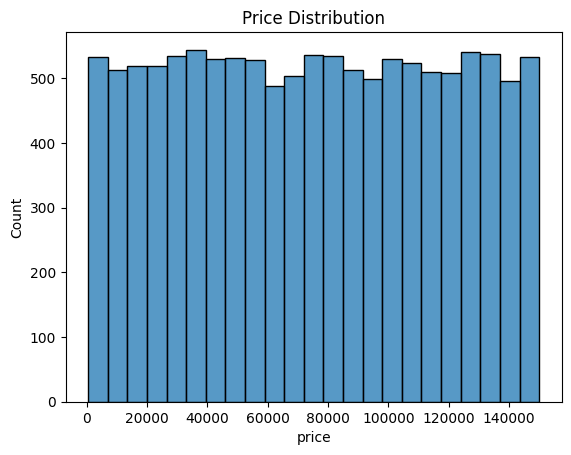

In [15]:
sns.histplot(df['price'])
plt.title("Price Distribution")
plt.show()


### Purchase Frequency Analysis

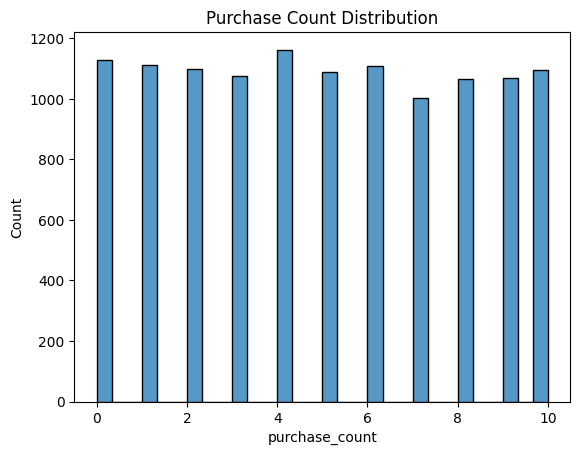

In [16]:
sns.histplot(df['purchase_count'], bins=30)
plt.title("Purchase Count Distribution")
plt.show()


### purchase count vs price

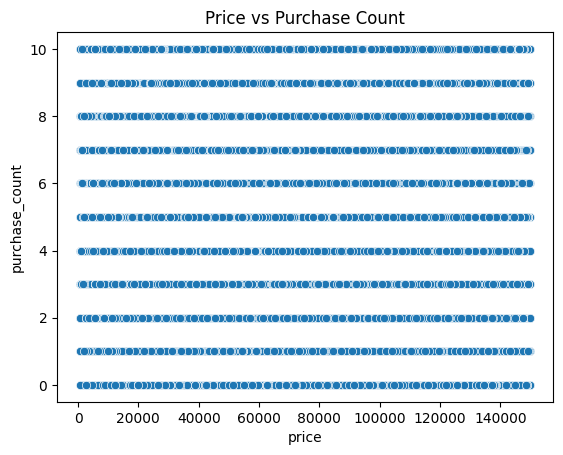

In [17]:
sns.scatterplot(x='price', y='purchase_count', data=df)
plt.title("Price vs Purchase Count")
plt.show()


### Most purchased products

In [18]:
top_products = (
    df.groupby('product_id')['purchase_count']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_products


product_id
ELECTRO_2928    42
ELECTRO_6991    40
ELECTRO_9602    39
ELECTRO_7455    38
ELECTRO_7344    38
ELECTRO_5806    38
ELECTRO_5187    38
ELECTRO_8965    37
ELECTRO_2152    36
ELECTRO_9726    36
Name: purchase_count, dtype: int64

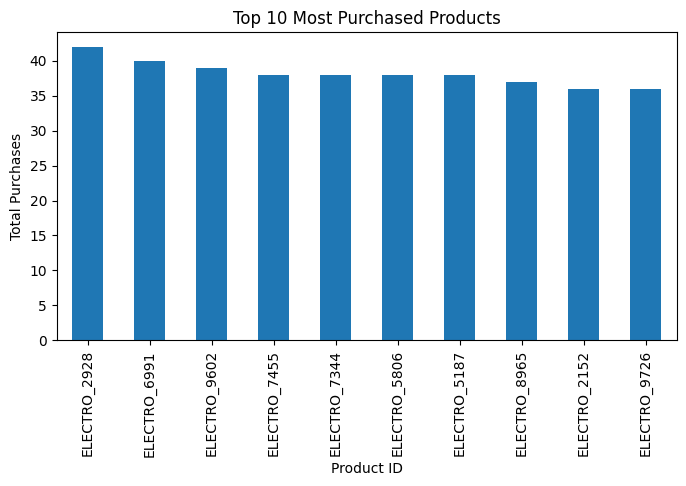

In [19]:
top_products.plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Product ID")
plt.ylabel("Total Purchases")
plt.show()


### Most purchased brands

In [20]:
top_brands = (
    df.groupby('brand')['purchase_count']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_brands


brand
dell       6197
hp         6133
oneplus    6081
sony       6071
apple      6045
boat       5919
samsung    5880
xiaomi     5761
lenovo     5696
realme     5597
Name: purchase_count, dtype: int64

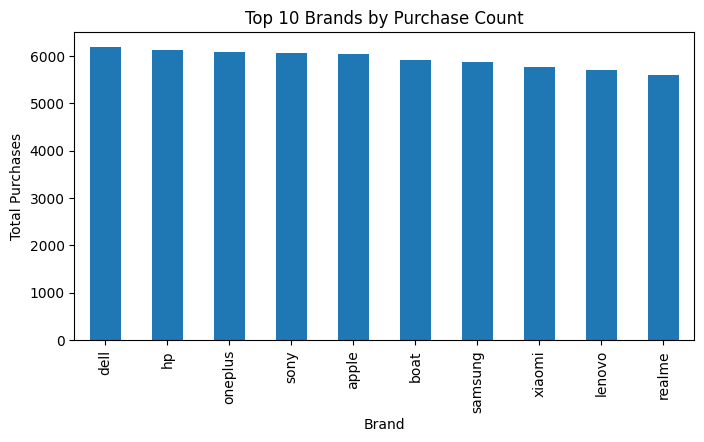

In [21]:
top_brands.plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Brands by Purchase Count")
plt.xlabel("Brand")
plt.ylabel("Total Purchases")
plt.show()


### Category wise popularity

In [22]:
category_popularity = (
    df.groupby('category')['purchase_count']
      .sum()
      .sort_values(ascending=False)
)

category_popularity


category
laptop         8812
accessories    8507
headphones     8485
mobile         8471
camera         8430
tablet         8354
smartwatch     8321
Name: purchase_count, dtype: int64

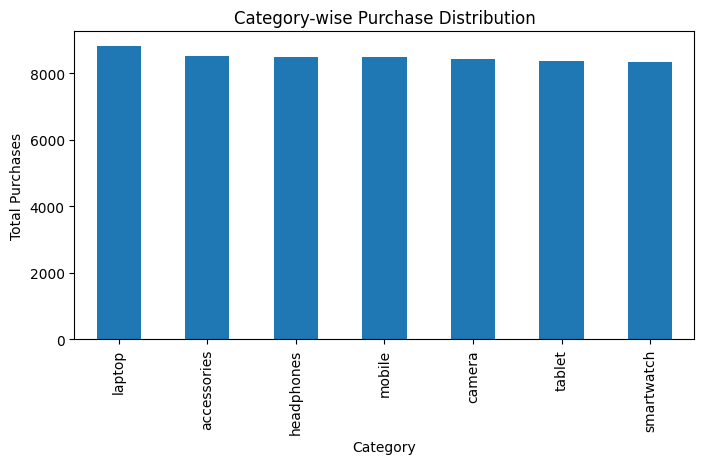

In [23]:
category_popularity.plot(kind='bar', figsize=(8,4))
plt.title("Category-wise Purchase Distribution")
plt.xlabel("Category")
plt.ylabel("Total Purchases")
plt.show()


### 

In [25]:
top_category = category_popularity.idxmax()

top_brands_in_category = (
    df[df['category'] == top_category]
    .groupby('brand')['purchase_count']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_brands_in_category


brand
oneplus    987
dell       957
boat       924
apple      885
hp         877
Name: purchase_count, dtype: int64

### Top brands per category

In [30]:
category_brand_sales = (
    df.groupby(['category', 'brand'], as_index=False)
      .agg(total_purchases=('purchase_count', 'sum'))
)


In [31]:
top_brand_per_category = (
    category_brand_sales
    .sort_values(['category', 'total_purchases'], ascending=[True, False])
    .groupby('category', as_index=False)
    .first()
)

top_brand_per_category


,category,brand,total_purchases
0,accessories,apple,947
1,camera,hp,992
2,headphones,realme,937
3,laptop,oneplus,987
4,mobile,boat,957
5,smartwatch,dell,930
6,tablet,hp,979


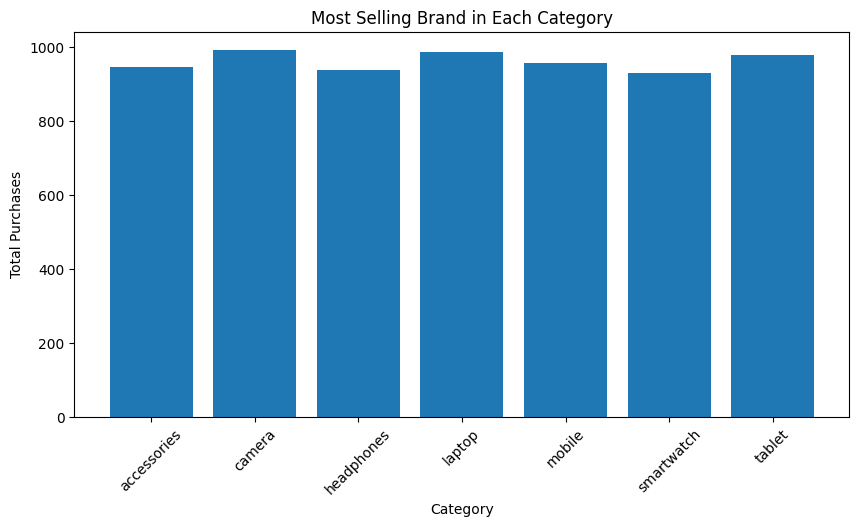

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(
    top_brand_per_category['category'],
    top_brand_per_category['total_purchases']
)
plt.xticks(rotation=45)
plt.title("Most Selling Brand in Each Category")
plt.xlabel("Category")
plt.ylabel("Total Purchases")
plt.show()
